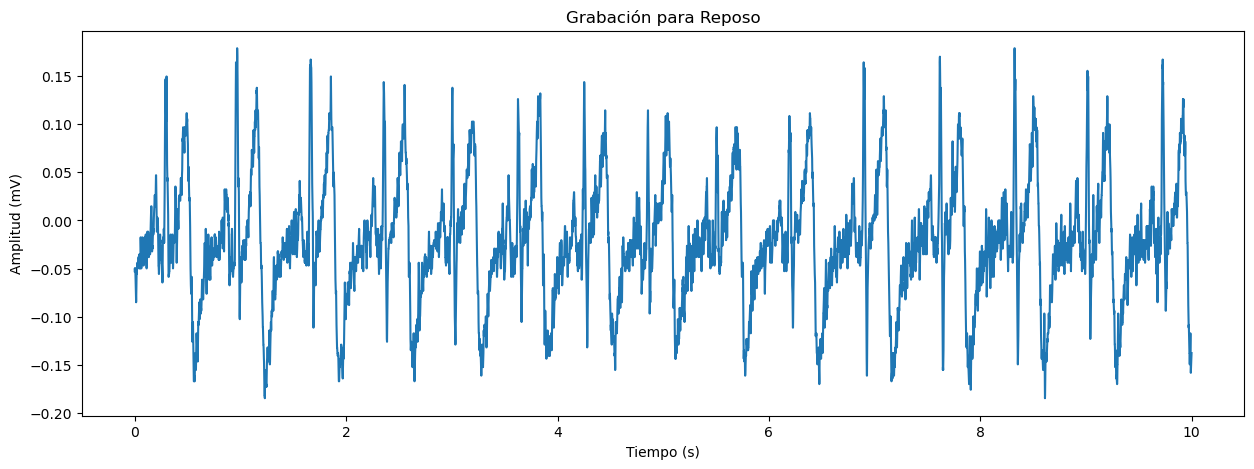

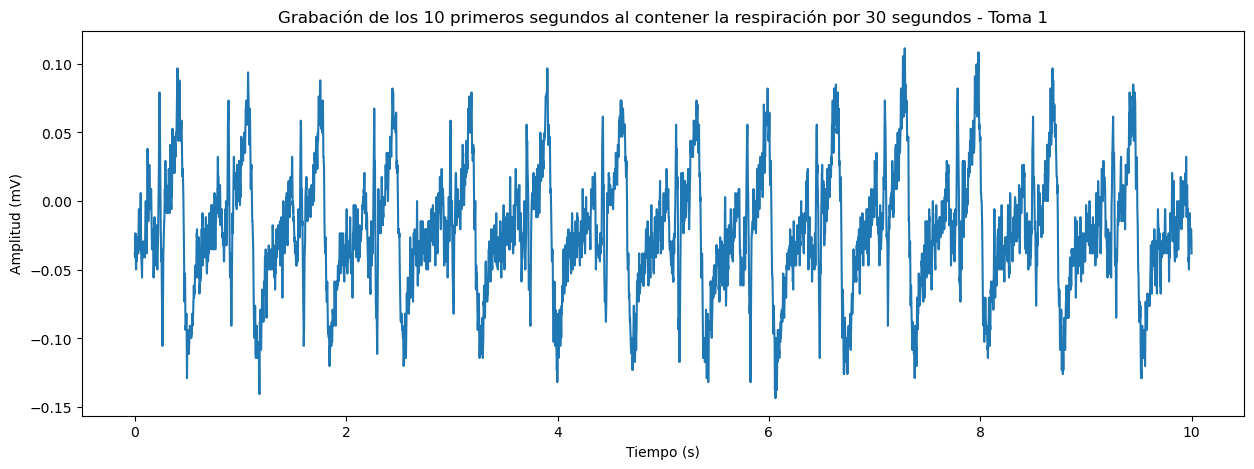

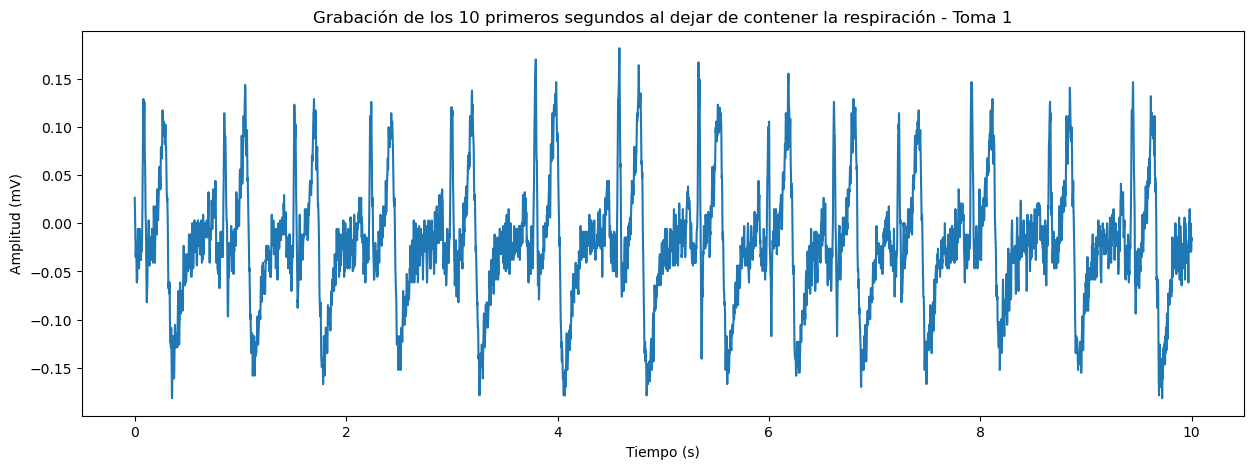

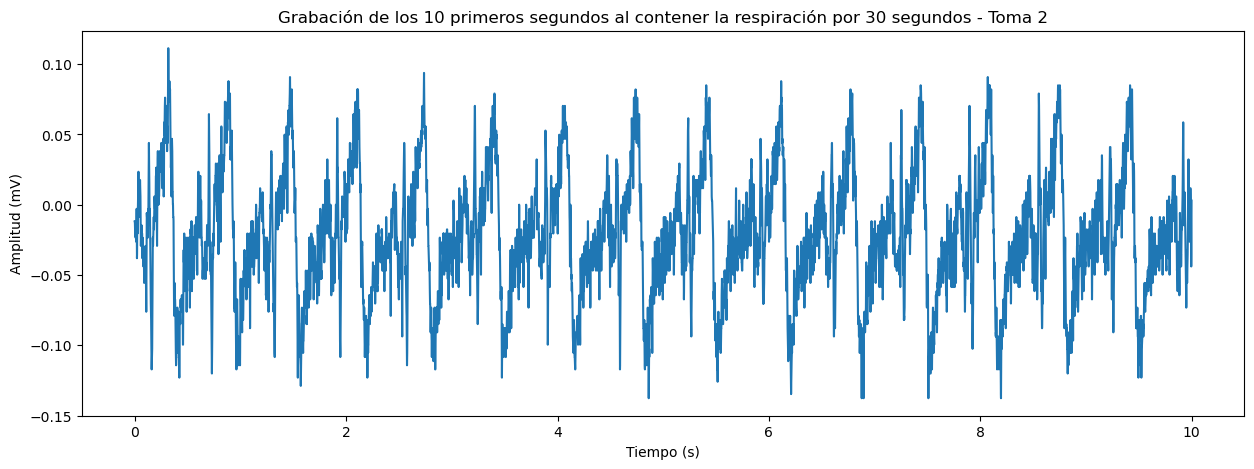

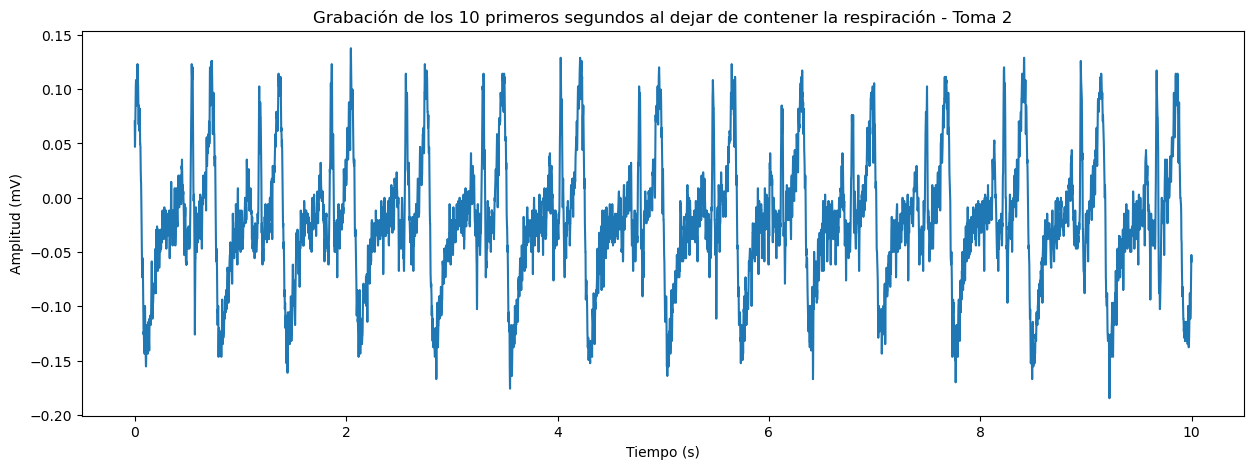

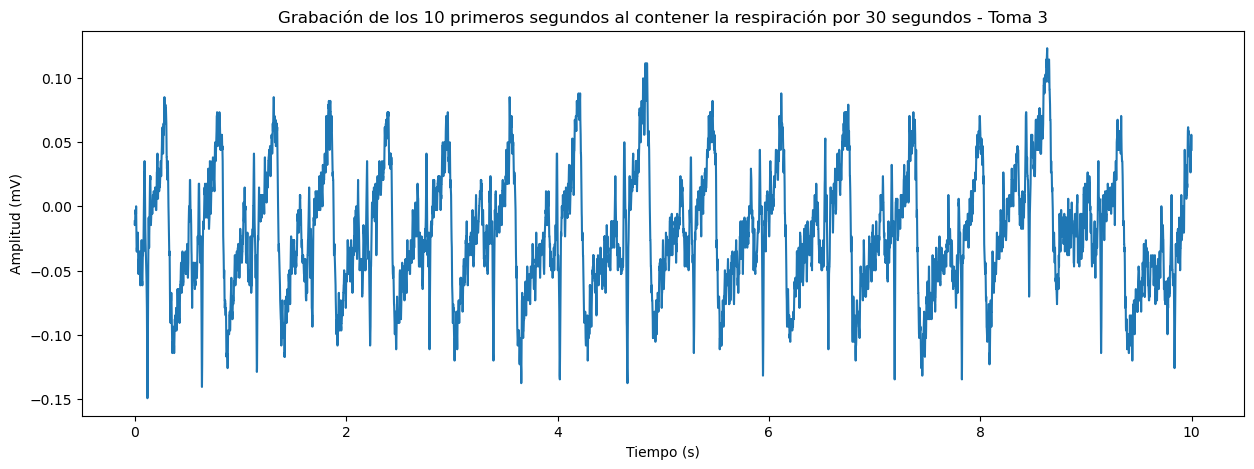

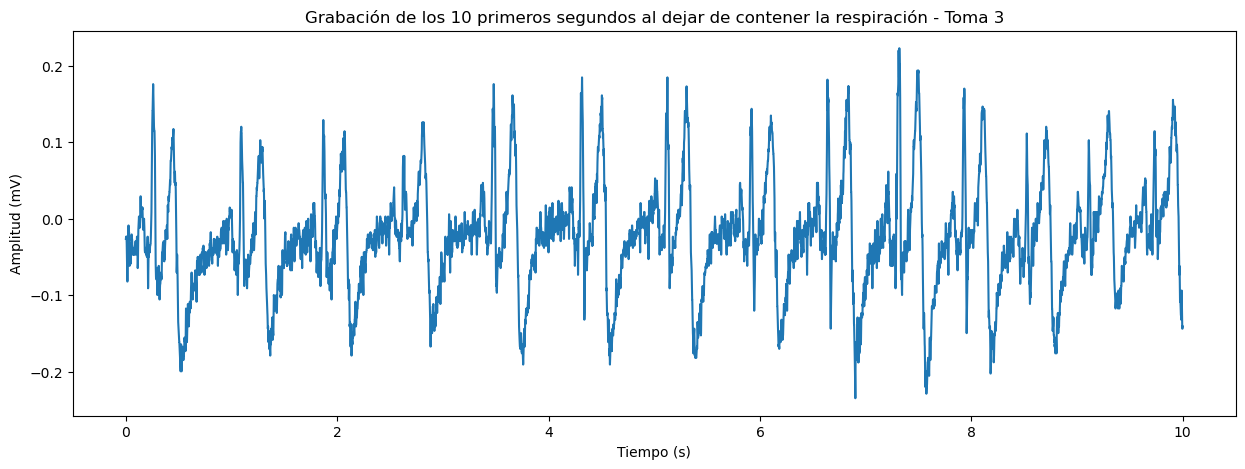

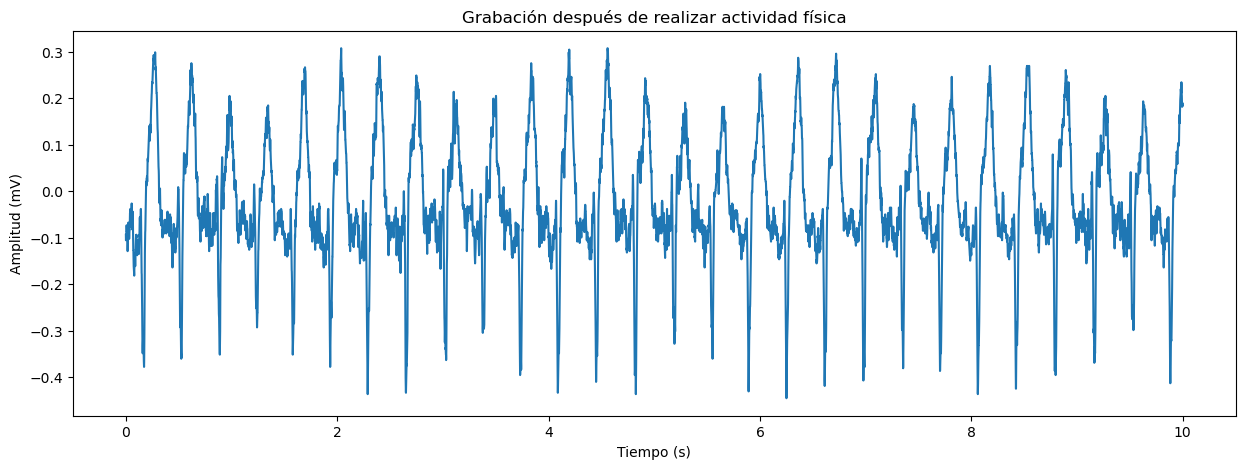

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
l=[]
#Reposo
ecg = np.loadtxt(r"C:\Users\RODRIGO\Desktop\GRUPO-04-ISB-2025-II\Laboratorios\Laboratorio 4 - ECG\Registro de datos\CG_Reposo.txt")
señal = ecg
mVR=((señal[:, 5]/1024)-0.5)*3.3*1000/1100
fs = 1000
inicio = 0
fin = 10000  
tiempo = np.arange(inicio, fin) / fs

plt.figure(figsize=(15, 5))
plt.plot(tiempo, mVR[inicio:fin])
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('Grabación para Reposo')
plt.show()
l.append(mVR[inicio:fin])

#Contención de la respiración por 30 segundos y después de 1 minuto de recuperación

ecg = np.loadtxt(r"C:\Users\RODRIGO\Desktop\GRUPO-04-ISB-2025-II\Laboratorios\Laboratorio 4 - ECG\Registro de datos\CG_SA_T1.txt")
señal1 = ecg[10000:20000]
señal2= ecg[40000:50000]
mV1=((señal1[:, 5]/1024)-0.5)*3.3*1000/1100
inicio = 0
fin = 10000  
tiempo = np.arange(inicio, fin) / fs

plt.figure(figsize=(15, 5))
plt.plot(tiempo, mV1[inicio:fin])
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('Grabación de los 10 primeros segundos al contener la respiración por 30 segundos - Toma 1')
plt.show()
l.append(mV1[inicio:fin])

mV4=((señal2[:, 5]/1024)-0.5)*3.3*1000/1100
inicio = 0
fin = 10000  
tiempo = np.arange(inicio, fin) / fs

plt.figure(figsize=(15, 5))
plt.plot(tiempo, mV4[inicio:fin])
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('Grabación de los 10 primeros segundos al dejar de contener la respiración - Toma 1')
plt.show()
l.append(mV4[inicio:fin])

ecg = np.loadtxt(r"C:\Users\RODRIGO\Desktop\GRUPO-04-ISB-2025-II\Laboratorios\Laboratorio 4 - ECG\Registro de datos\CG_SA_T2.txt")
señal1 = ecg[10000:20000]
señal2= ecg[40000:50000]
mV2=((señal1[:, 5]/1024)-0.5)*3.3*1000/1100
inicio = 0
fin = 10000  
tiempo = np.arange(inicio, fin) / fs

plt.figure(figsize=(15, 5))
plt.plot(tiempo, mV2[inicio:fin])
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('Grabación de los 10 primeros segundos al contener la respiración por 30 segundos - Toma 2')
plt.show()
l.append(mV2[inicio:fin])

mV5=((señal2[:, 5]/1024)-0.5)*3.3*1000/1100
inicio = 0
fin = 10000  
tiempo = np.arange(inicio, fin) / fs

plt.figure(figsize=(15, 5))
plt.plot(tiempo, mV5[inicio:fin])
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('Grabación de los 10 primeros segundos al dejar de contener la respiración - Toma 2')
plt.show()
l.append(mV5[inicio:fin])

ecg = np.loadtxt(r"C:\Users\RODRIGO\Desktop\GRUPO-04-ISB-2025-II\Laboratorios\Laboratorio 4 - ECG\Registro de datos\CG_SA_T3.txt")
señal1 = ecg[10000:20000]
señal2= ecg[40000:50000]
mV3=((señal1[:, 5]/1024)-0.5)*3.3*1000/1100
inicio = 0
fin = 10000  
tiempo = np.arange(inicio, fin) / fs

plt.figure(figsize=(15, 5))
plt.plot(tiempo, mV3[inicio:fin])
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('Grabación de los 10 primeros segundos al contener la respiración por 30 segundos - Toma 3')
plt.show()
l.append(mV3[inicio:fin])

mV6=((señal2[:, 5]/1024)-0.5)*3.3*1000/1100
inicio = 0
fin = 10000  
tiempo = np.arange(inicio, fin) / fs

plt.figure(figsize=(15, 5))
plt.plot(tiempo, mV6[inicio:fin])
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('Grabación de los 10 primeros segundos al dejar de contener la respiración - Toma 3')
plt.show()
l.append(mV6[inicio:fin])


#Actividad física
ecg = np.loadtxt(r"C:\Users\RODRIGO\Desktop\GRUPO-04-ISB-2025-II\Laboratorios\Laboratorio 4 - ECG\Registro de datos\CG_AF_T1.txt")
señal = ecg
mVAF=((señal[:, 5]/1024)-0.5)*3.3*1000/1100
inicio = 0
fin = 10000  
tiempo = np.arange(inicio, fin) / fs

plt.figure(figsize=(15, 5))
plt.plot(tiempo, mVAF[inicio:fin])
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('Grabación después de realizar actividad física')
plt.show()
l.append(mVAF[inicio:fin])

## Tratamiento de señales


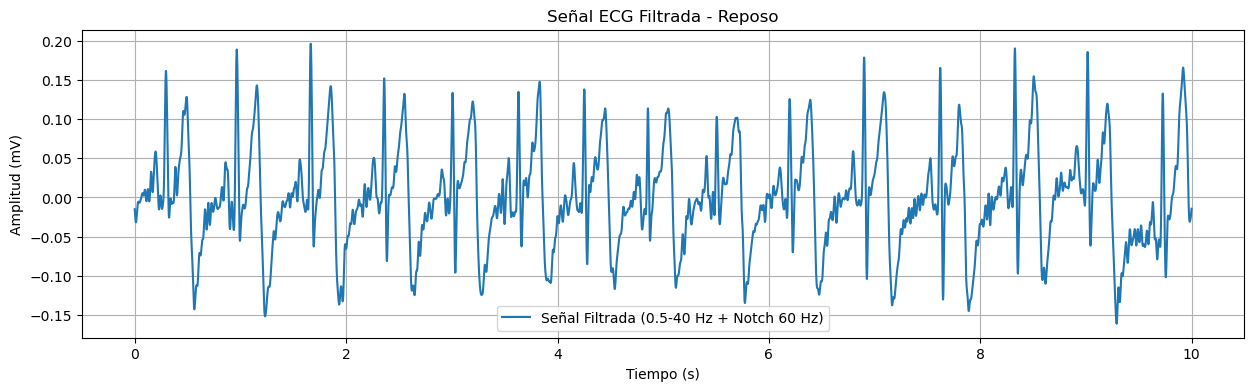

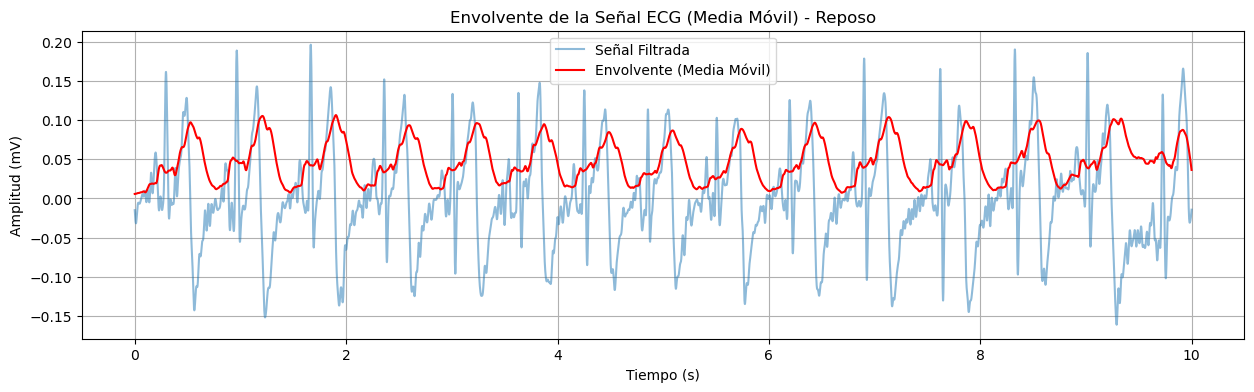

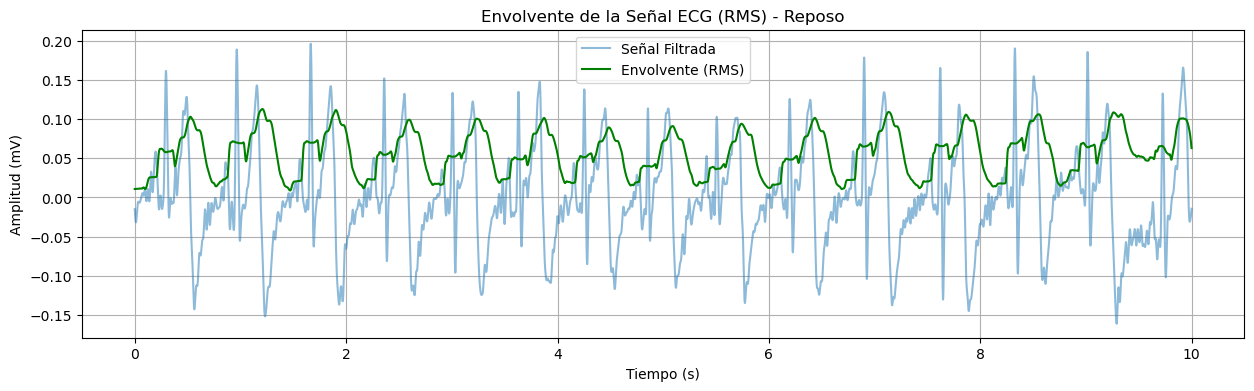

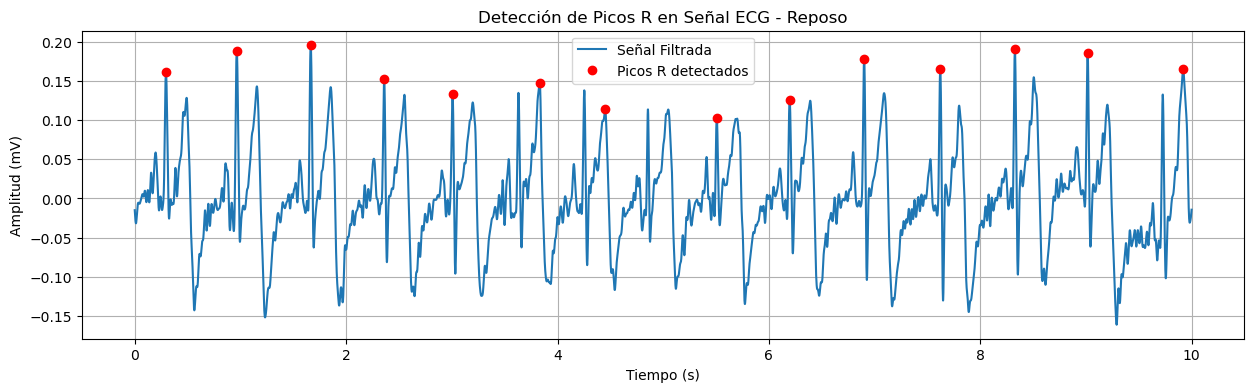

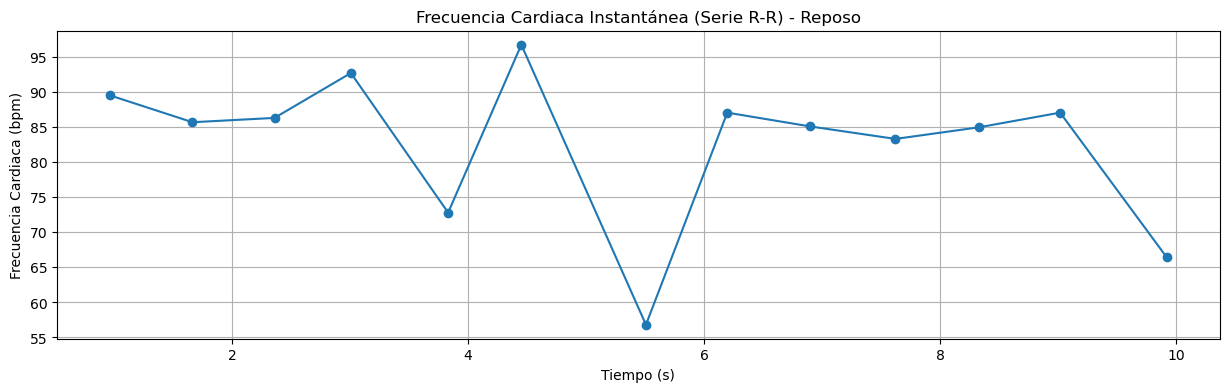

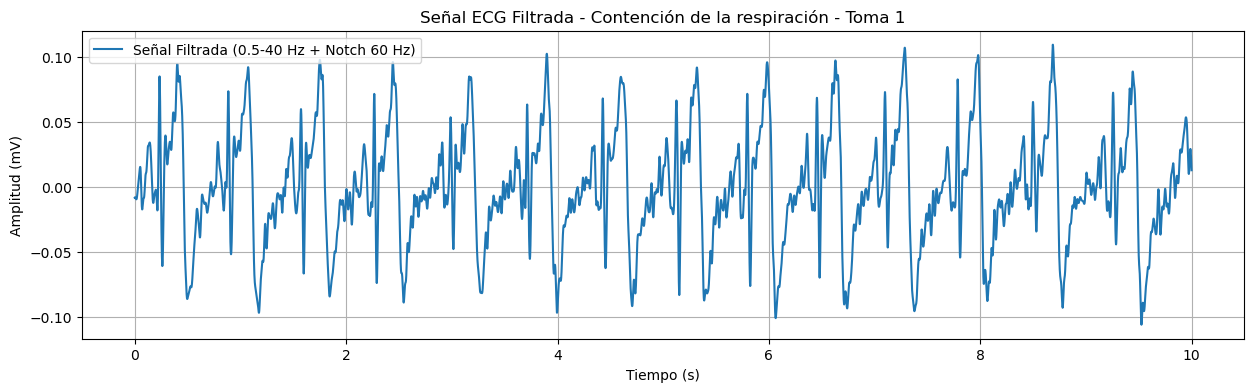

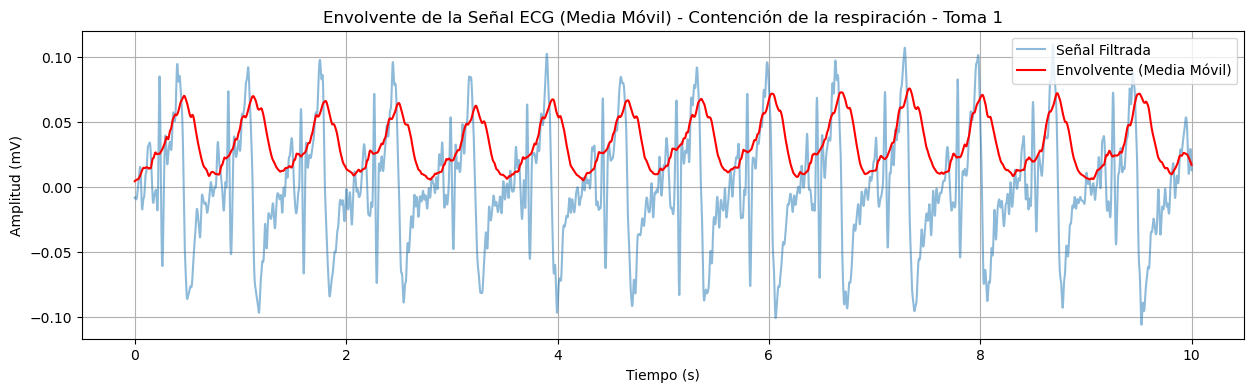

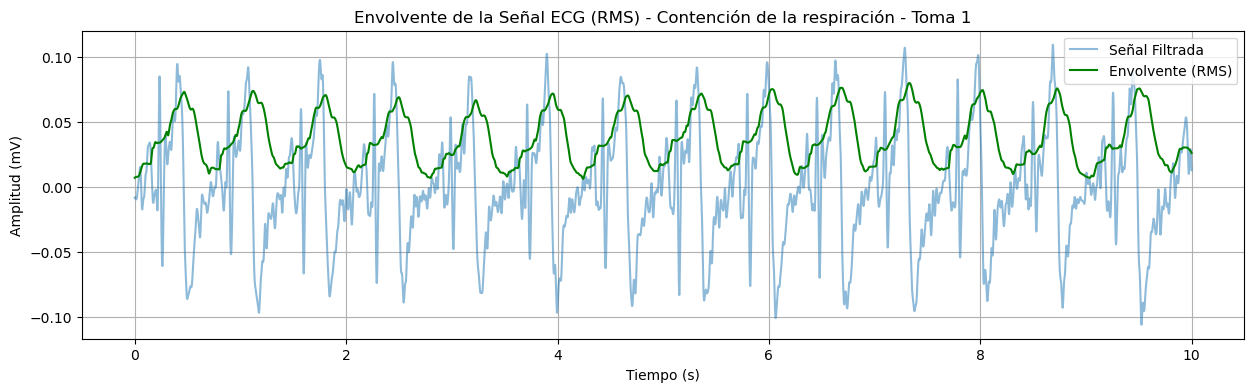

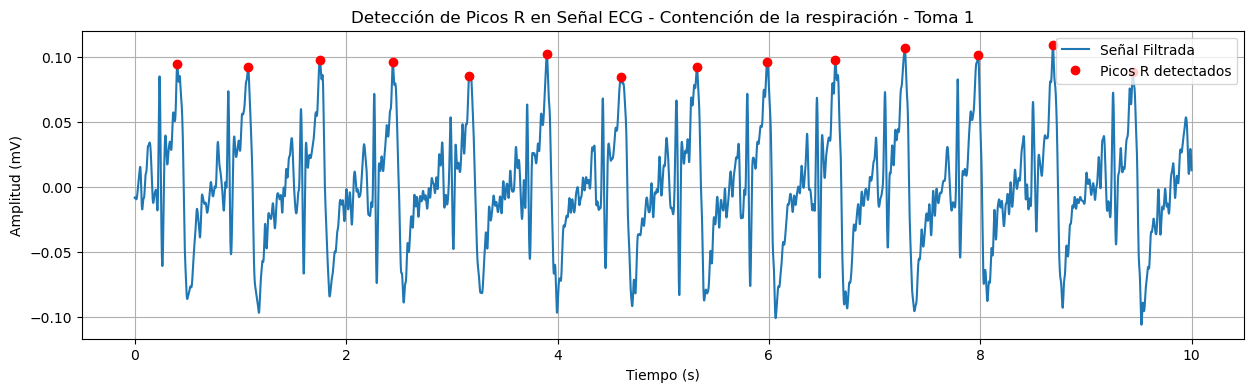

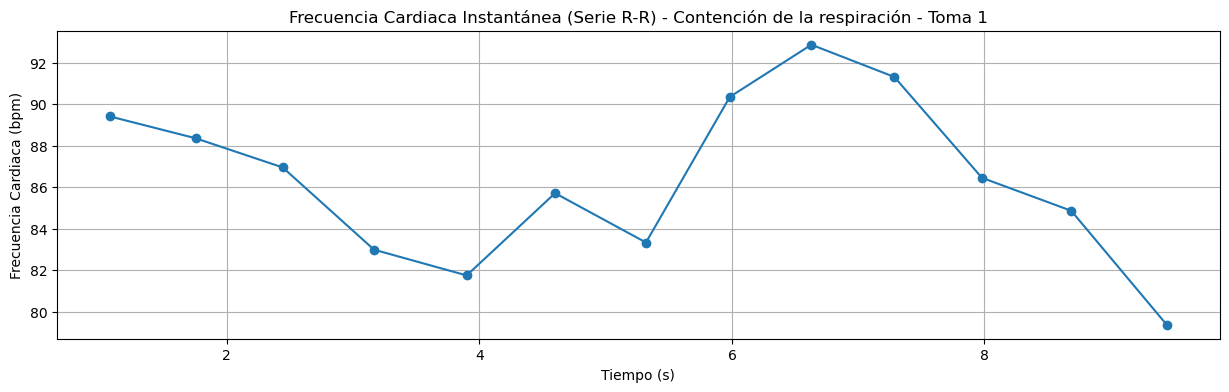

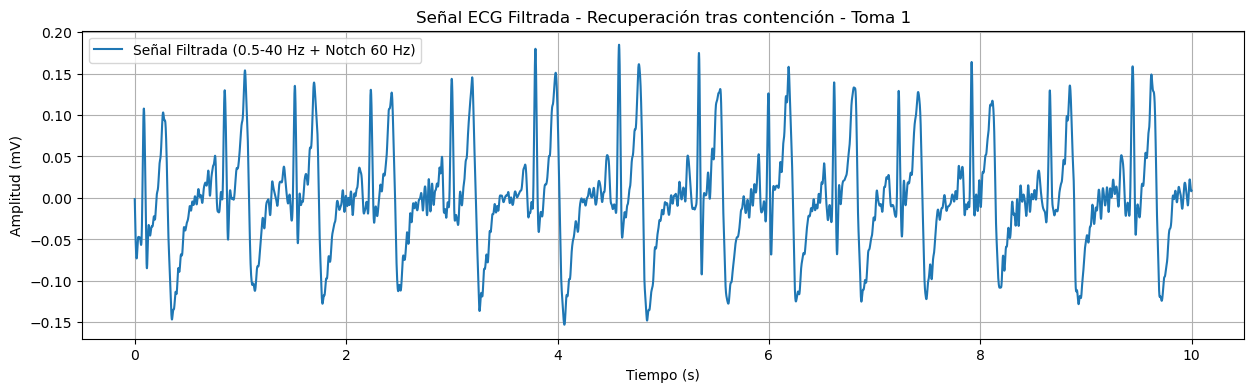

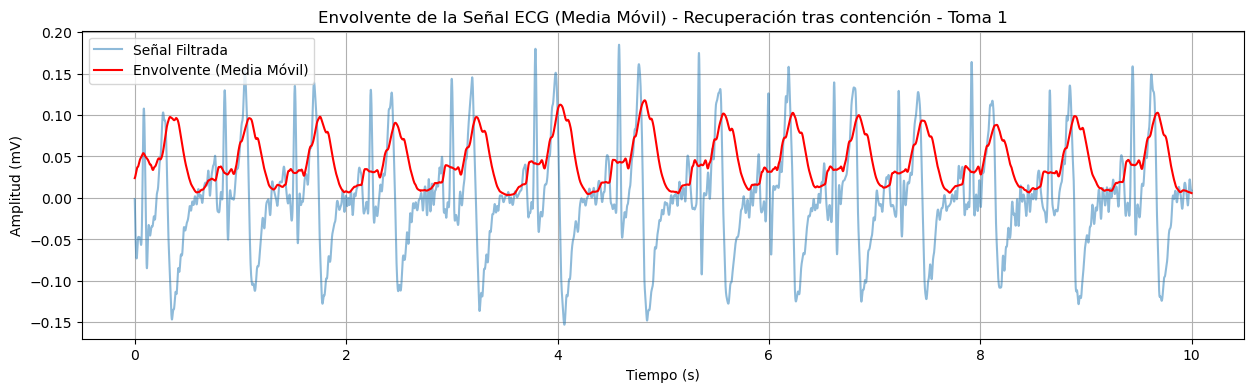

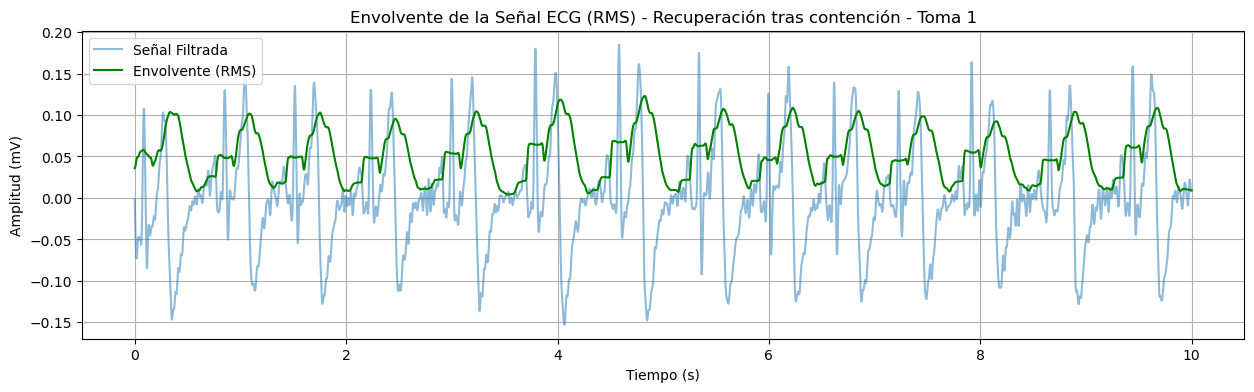

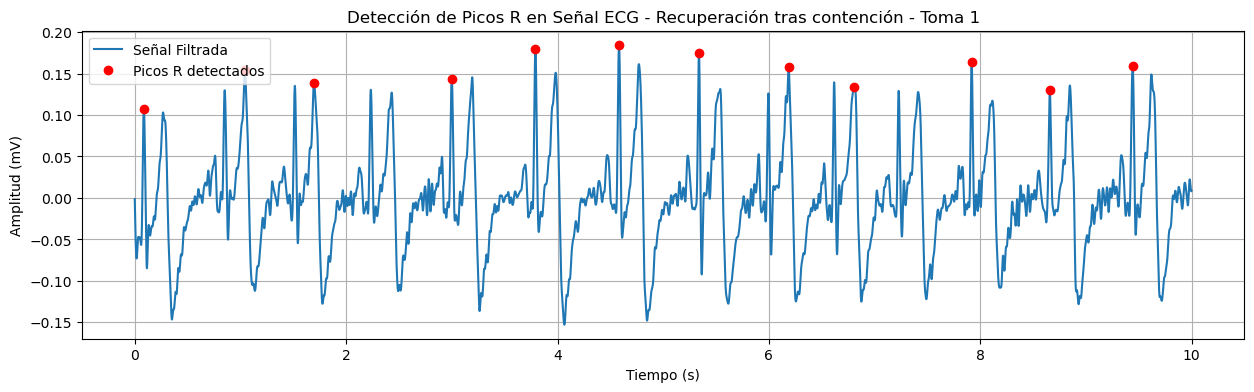

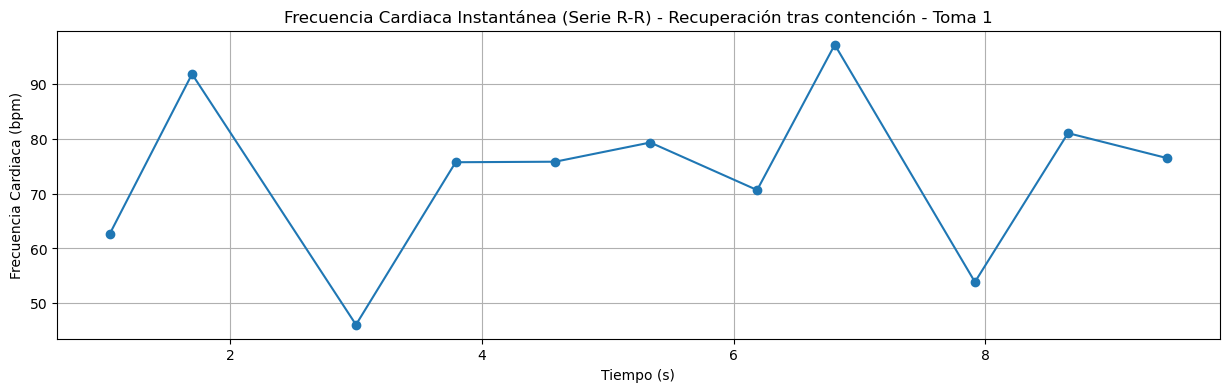

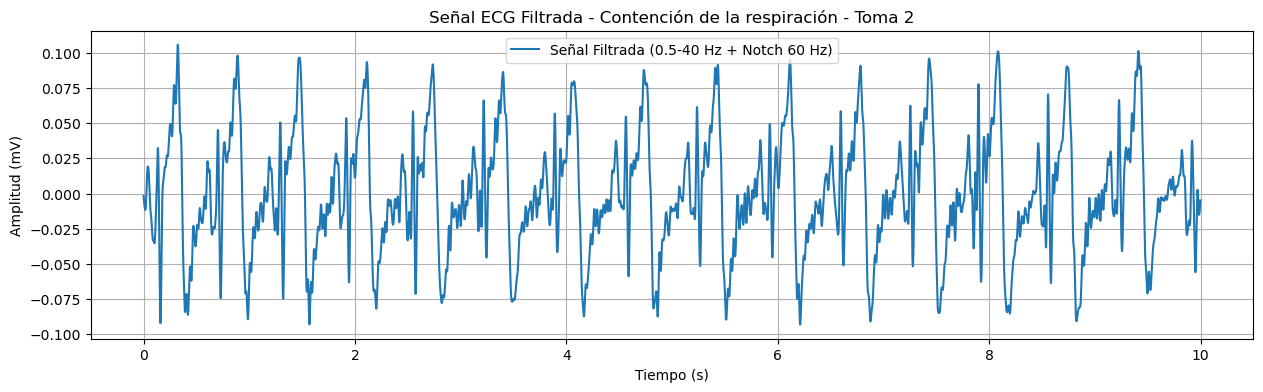

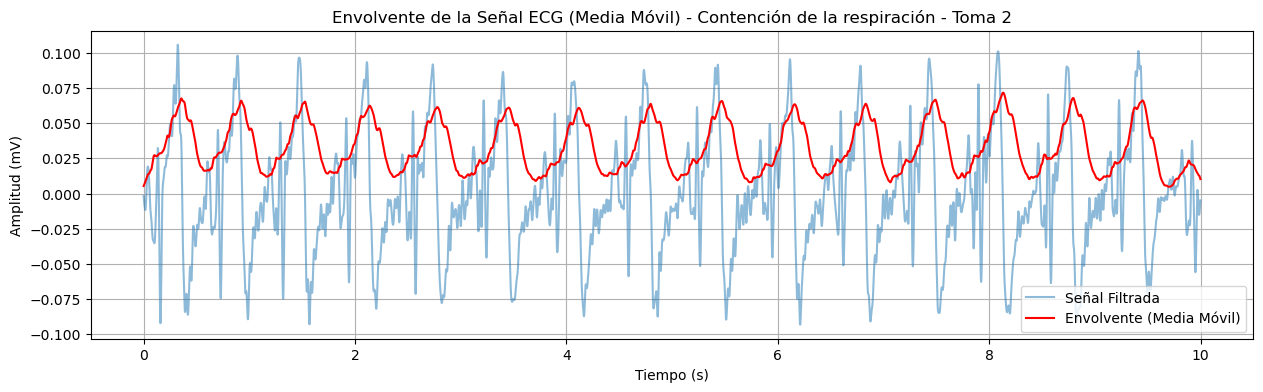

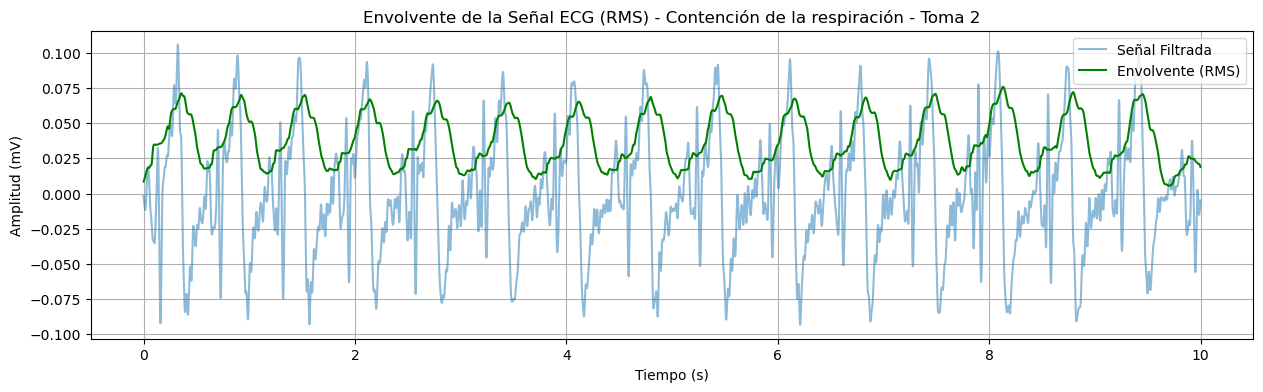

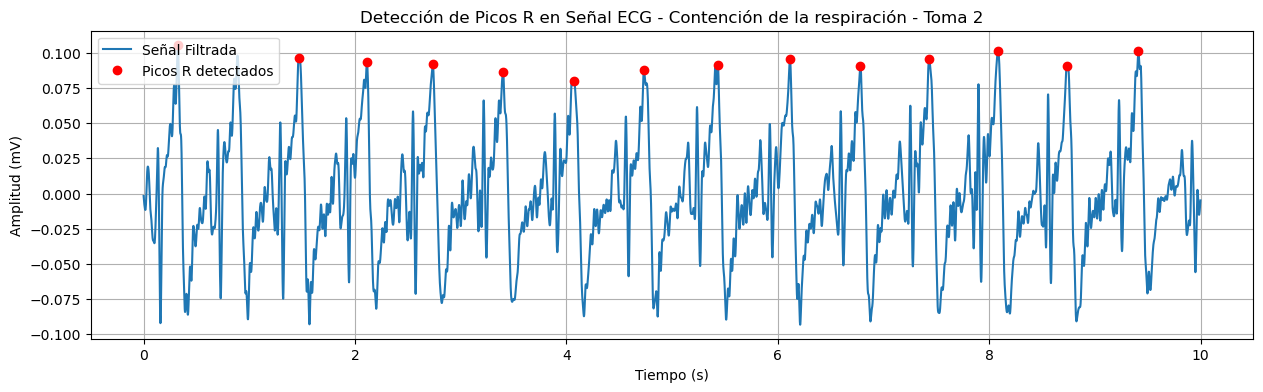

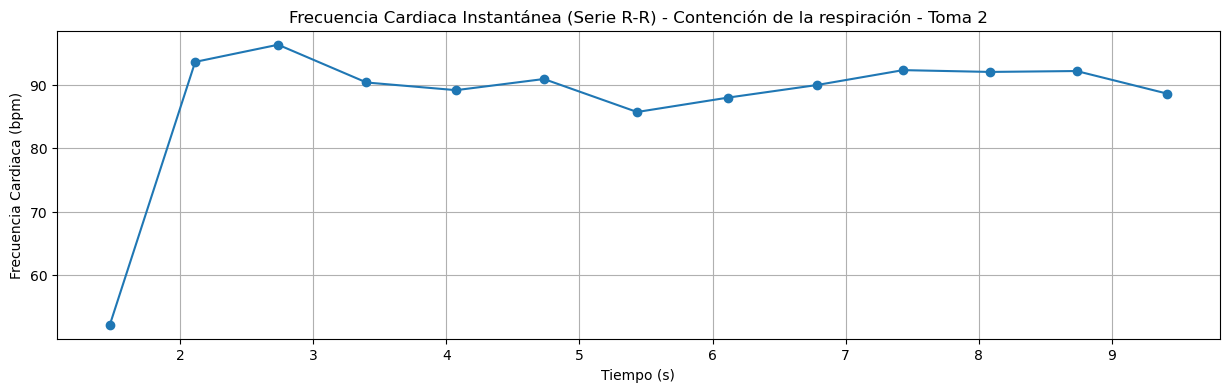

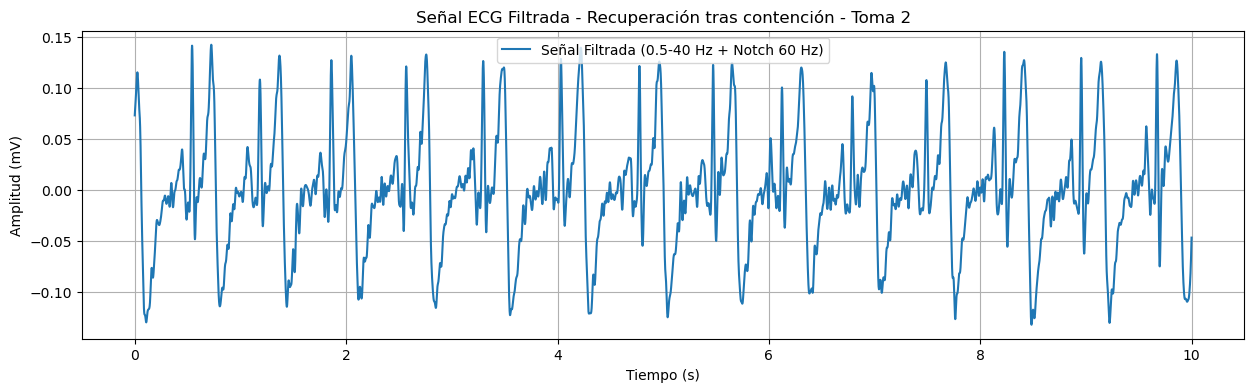

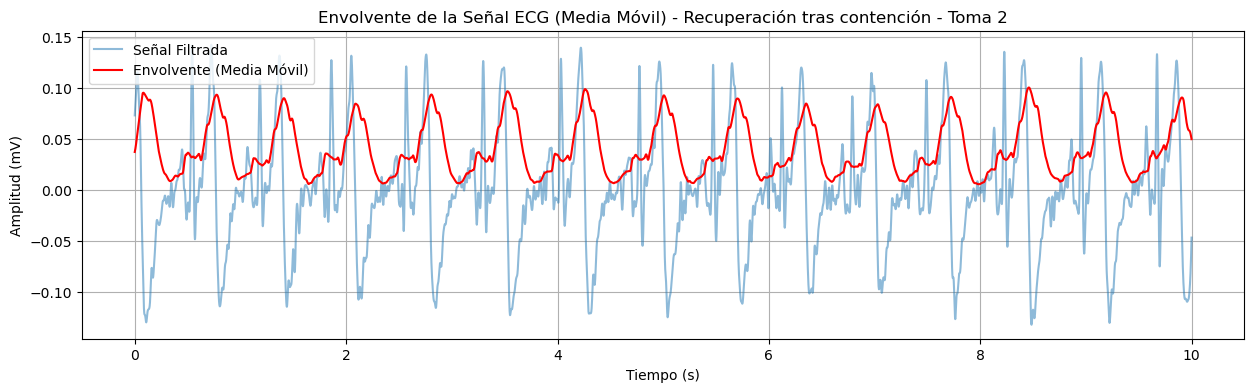

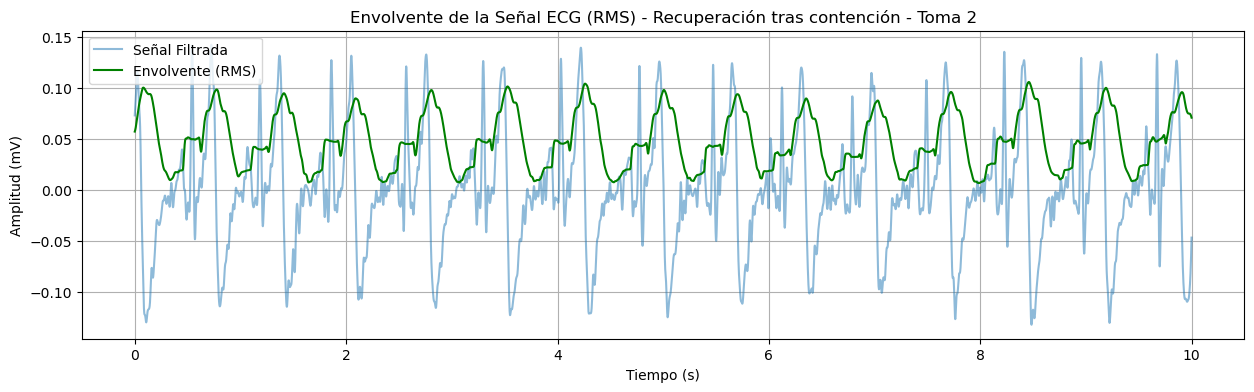

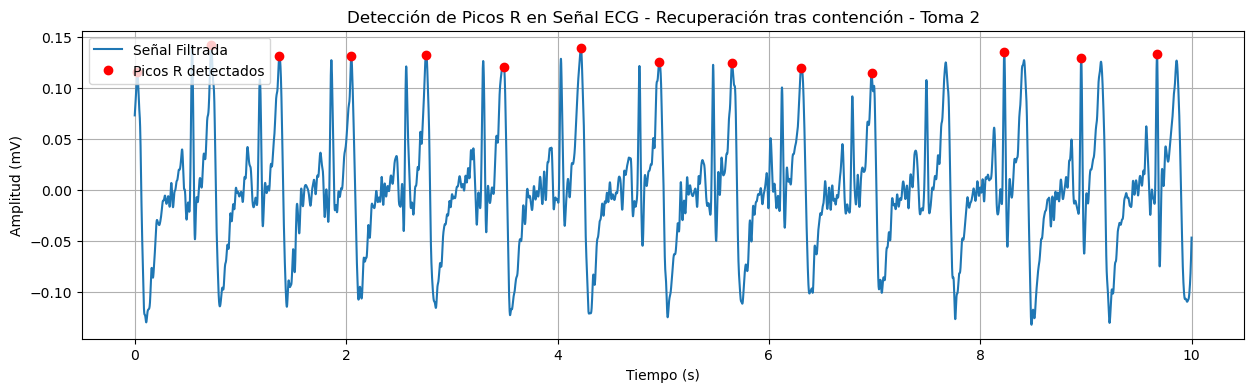

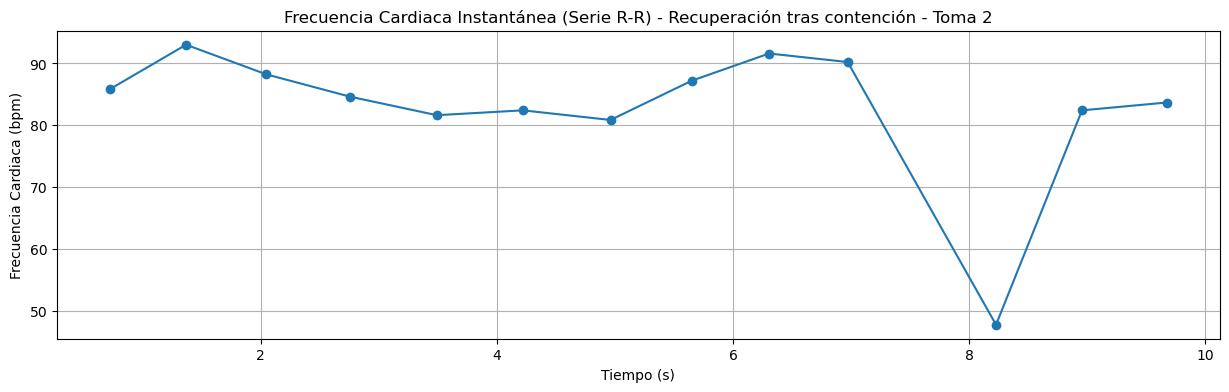

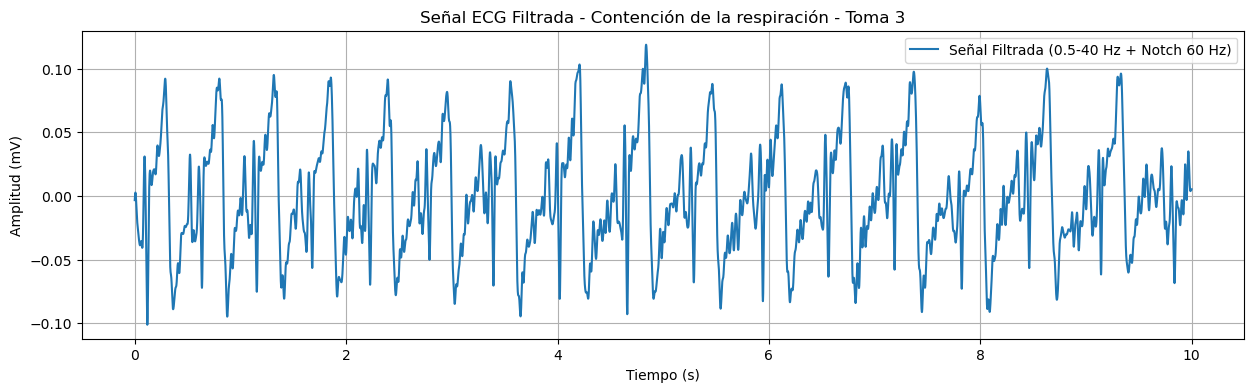

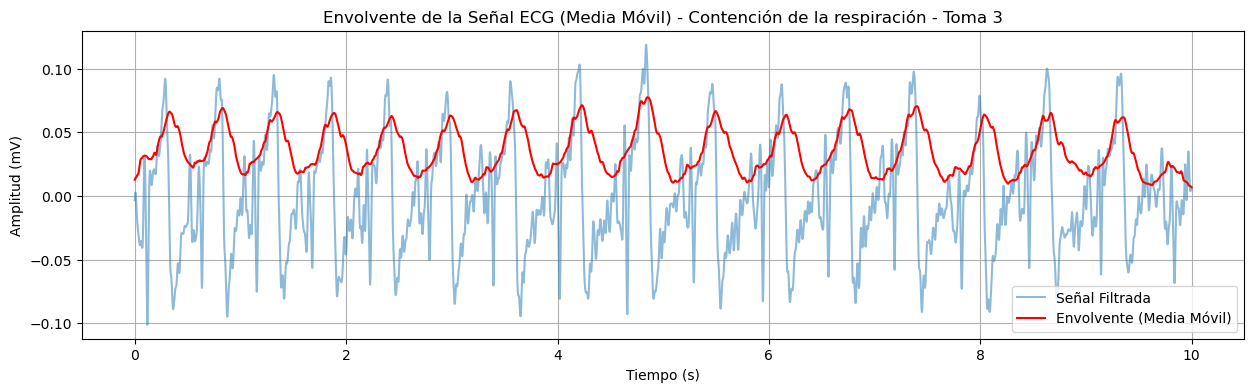

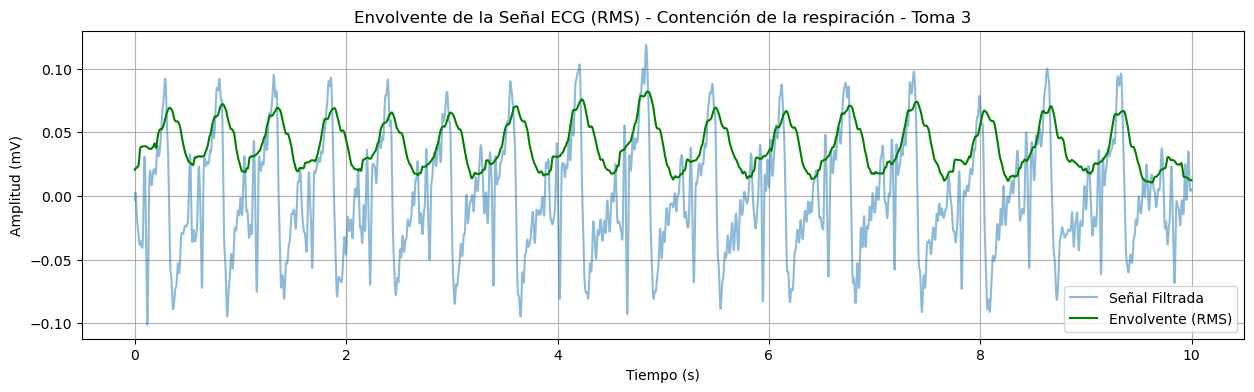

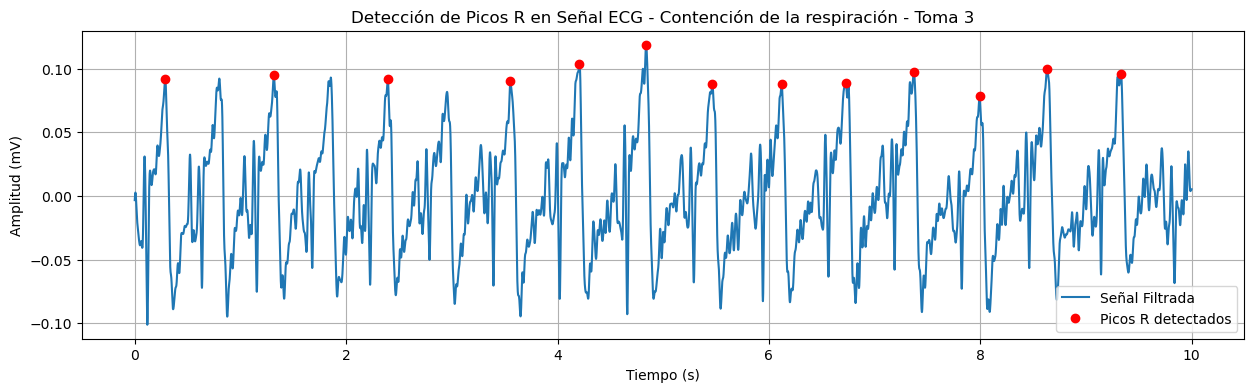

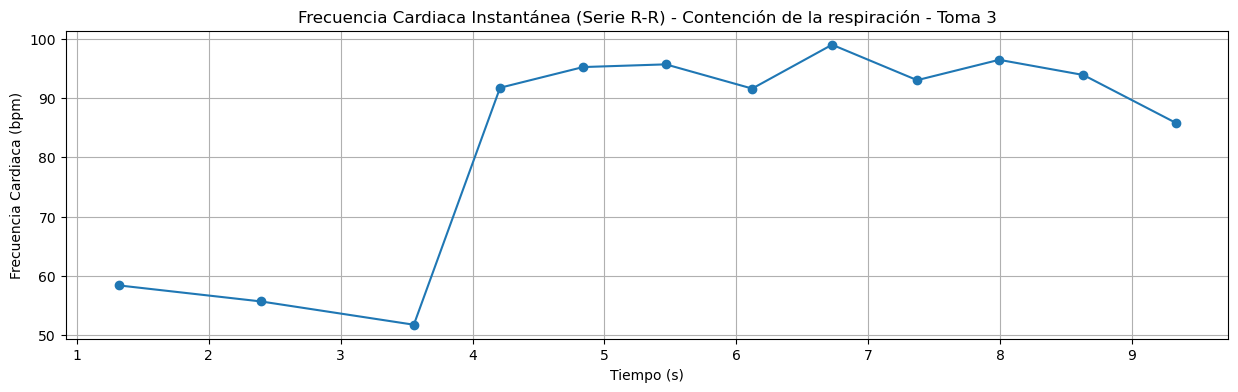

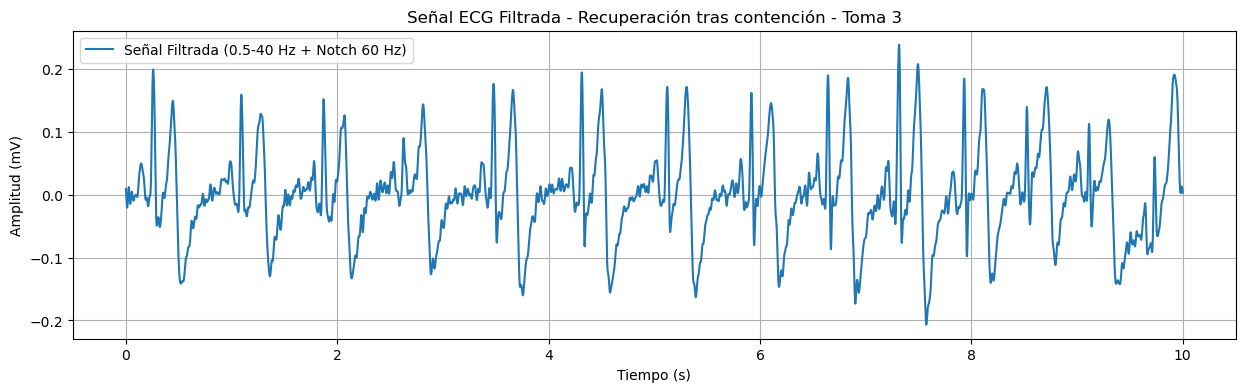

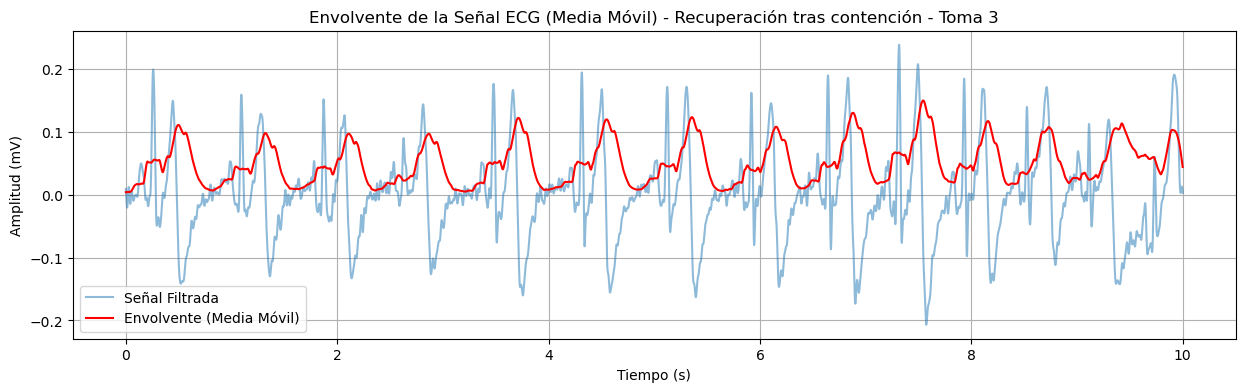

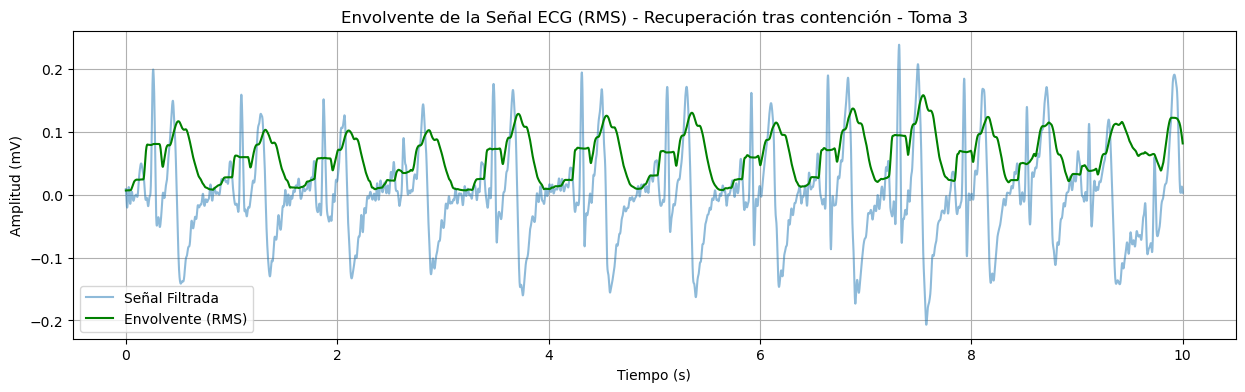

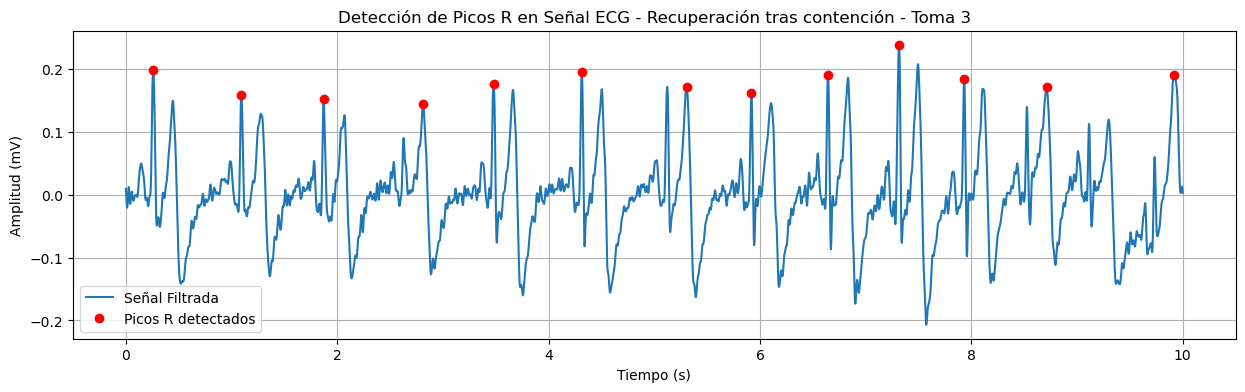

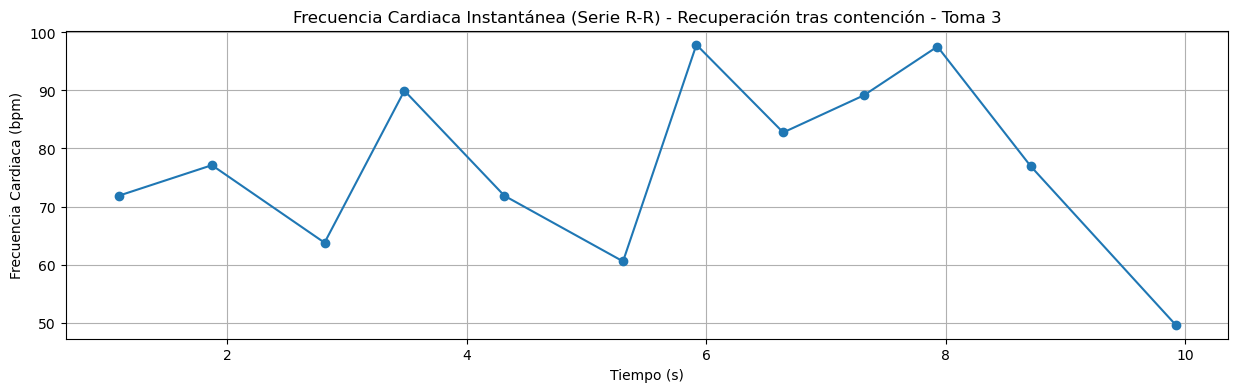

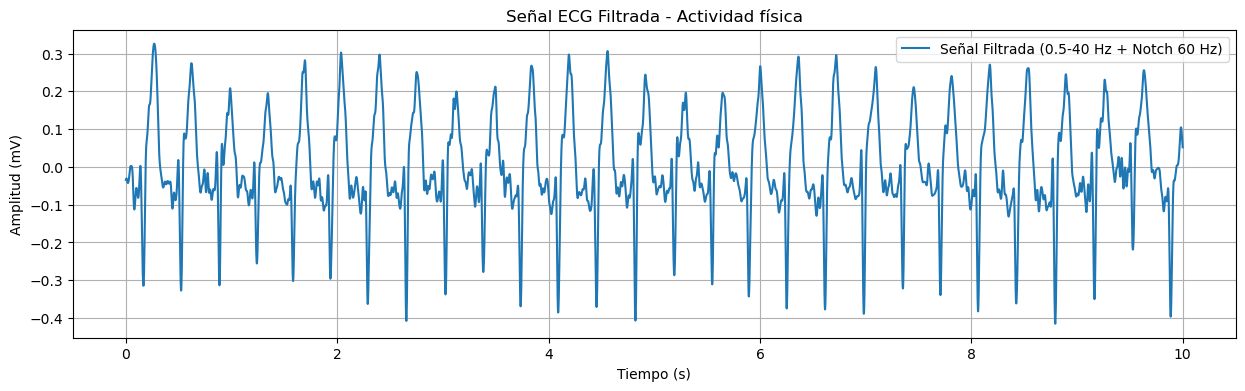

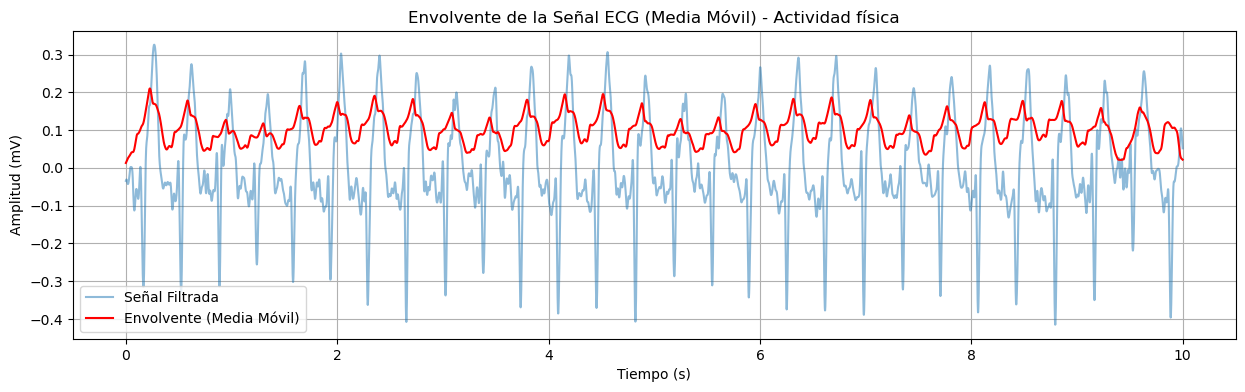

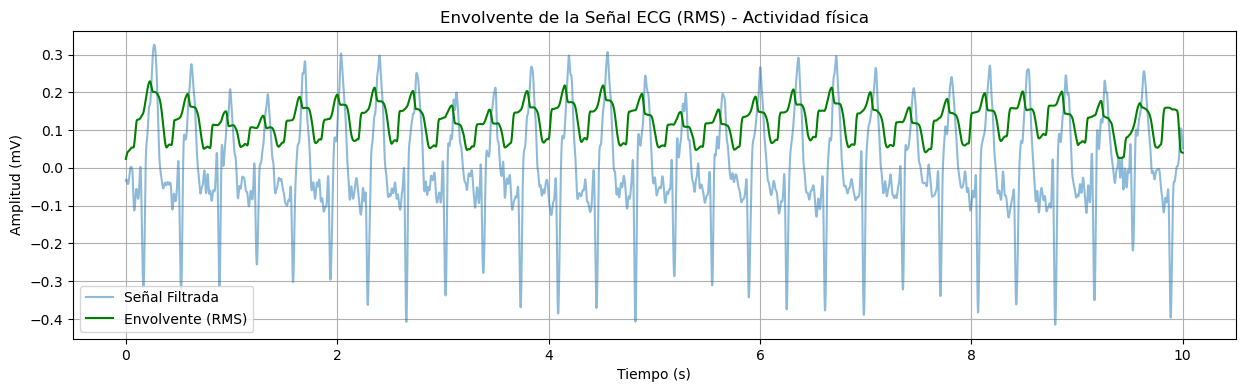

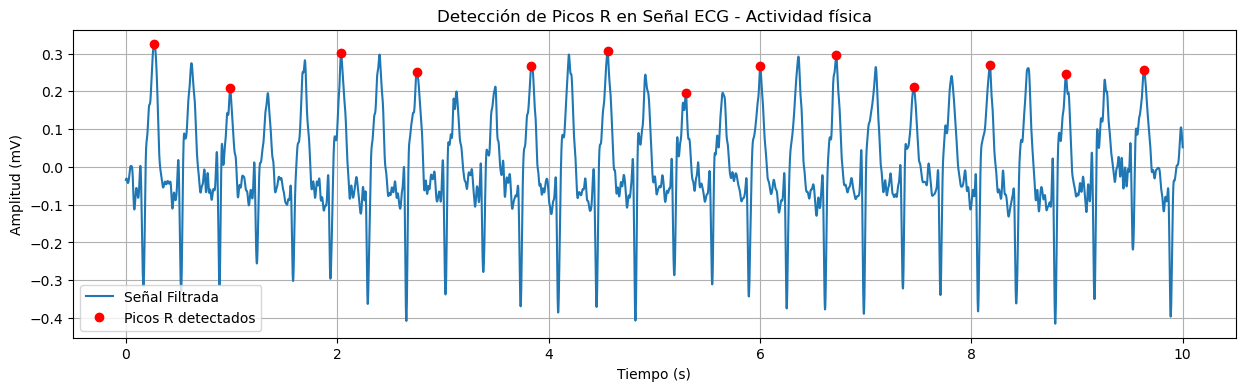

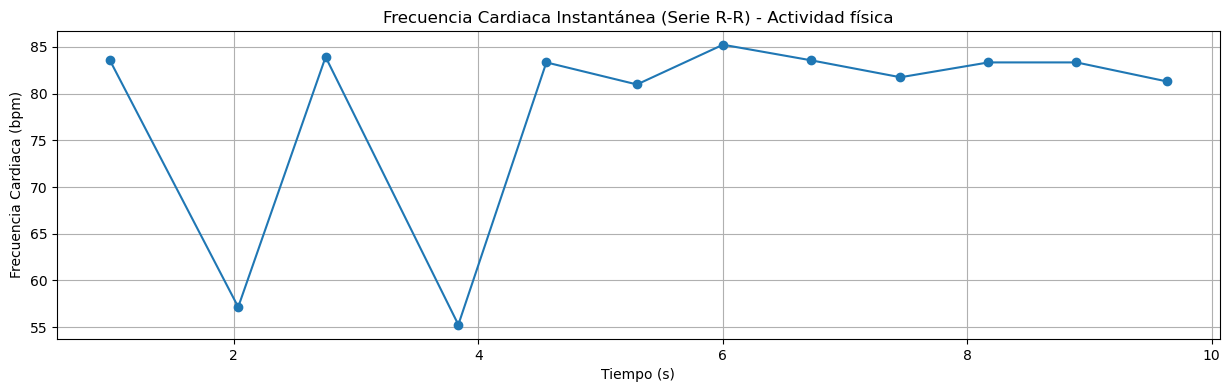

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, iirnotch, find_peaks
# --- Funciones de filtrado ---
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y
def notch_filter(data, notch_freq, fs, quality_factor=30):
    nyq = 0.5 * fs
    w0 = notch_freq / nyq
    b, a = iirnotch(w0, quality_factor)
    y = filtfilt(b, a, data)
    return y
# --- Funciones para envolvente ---
def moving_average(signal, window_size):
    window = np.ones(window_size) / window_size
    return np.convolve(signal, window, mode='same')
def moving_rms(signal, window_size):
    squared = signal**2
    mean_squared = moving_average(squared, window_size)
    return np.sqrt(mean_squared)

fs = 1000  
lowcut = 0.5
highcut = 40.0
notch_freq = 60.0
nombres=["Reposo","Contención de la respiración - Toma 1","Recuperación tras contención - Toma 1","Contención de la respiración - Toma 2","Recuperación tras contención - Toma 2","Contención de la respiración - Toma 3","Recuperación tras contención - Toma 3","Actividad física"]
for i in range(len(l)):
    senal_filtrada = bandpass_filter(l[i], lowcut, highcut, fs)
    senal_filtrada = notch_filter(senal_filtrada, notch_freq, fs)
# Graficar señal filtrada
    tiempo = np.arange(len(l[i])) / fs
    plt.figure(figsize=(15,4))
    plt.plot(tiempo, senal_filtrada, label='Señal Filtrada (0.5-40 Hz + Notch 60 Hz)')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud (mV)')
    plt.title('Señal ECG Filtrada - '+nombres[i])
    plt.legend()
    plt.grid()
    plt.show()

    senal_rectificada = np.abs(senal_filtrada)
    window_size = int(0.150 * fs)  
    envolvente_media_movil = moving_average(senal_rectificada, window_size)
    envolvente_rms = moving_rms(senal_filtrada, window_size)
# Graficar envolvente (media móvil)
    plt.figure(figsize=(15,4))
    plt.plot(tiempo, senal_filtrada, label='Señal Filtrada', alpha=0.5)
    plt.plot(tiempo, envolvente_media_movil, label='Envolvente (Media Móvil)', color='red')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud (mV)')
    plt.title('Envolvente de la Señal ECG (Media Móvil) - '+nombres[i])
    plt.legend()
    plt.grid()
    plt.show()
# Graficar envolvente (RMS)
    plt.figure(figsize=(15,4))
    plt.plot(tiempo, senal_filtrada, label='Señal Filtrada', alpha=0.5)
    plt.plot(tiempo, envolvente_rms, label='Envolvente (RMS)', color='green')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud (mV)')
    plt.title('Envolvente de la Señal ECG (RMS) - '+nombres[i])
    plt.legend()
    plt.grid()
    plt.show()

    distancia_minima = int(0.6 * fs)  
    altura_minima = np.max(senal_filtrada) * 0.5  
    picos_R, propiedades = find_peaks(senal_filtrada, distance=distancia_minima, height=altura_minima)
# Calcular intervalos R-R en segundos
    intervalos_RR = np.diff(picos_R) / fs
# Calcular frecuencia cardiaca instantánea (bpm)
    frecuencia_cardiaca = 60 / intervalos_RR
# Tiempos de los picos R
    tiempos_picos = picos_R / fs
# Graficar señal filtrada con picos R detectados
    plt.figure(figsize=(15,4))
    plt.plot(tiempo, senal_filtrada, label='Señal Filtrada')
    plt.plot(tiempos_picos, senal_filtrada[picos_R], 'ro', label='Picos R detectados')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud (mV)')
    plt.title('Detección de Picos R en Señal ECG - '+nombres[i])
    plt.legend()
    plt.grid()
    plt.show()
# Graficar frecuencia cardiaca instantánea
    plt.figure(figsize=(15,4))
    plt.plot(tiempos_picos[1:], frecuencia_cardiaca, marker='o')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Frecuencia Cardiaca (bpm)')
    plt.title('Frecuencia Cardiaca Instantánea (Serie R-R) - '+nombres[i])
    plt.grid()
    plt.show()




